In [2]:
import kaggle

kaggle.api.dataset_download_files('unsdsn/world-happiness', path='data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness


In [4]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, geom_point, labs, theme, scale_fill_manual
import plotly.express as px

# Load the World Happiness Report dataset
happiness_report = pd.read_csv('data/2016.csv')
happiness_report

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [2]:
# Data Preprocessing and EDA
(happiness_report.describe())

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [3]:
(happiness_report.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

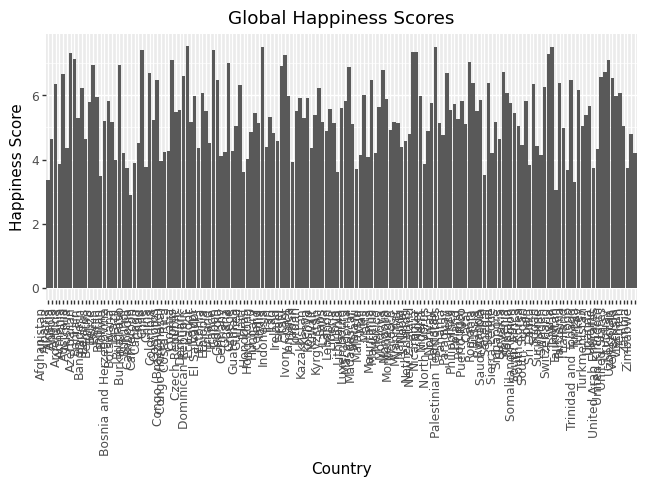

In [7]:
# Global Happiness Scores Bar Chart using Plotnine
import plotnine as p9
(ggplot(happiness_report, aes('Country', 'Happiness Score'))
 + geom_bar(stat='identity')
 + theme(axis_text_x=p9.element_text(rotation=90, hjust=1))
 + labs(title='Global Happiness Scores', x='Country', y='Happiness Score')
).draw()

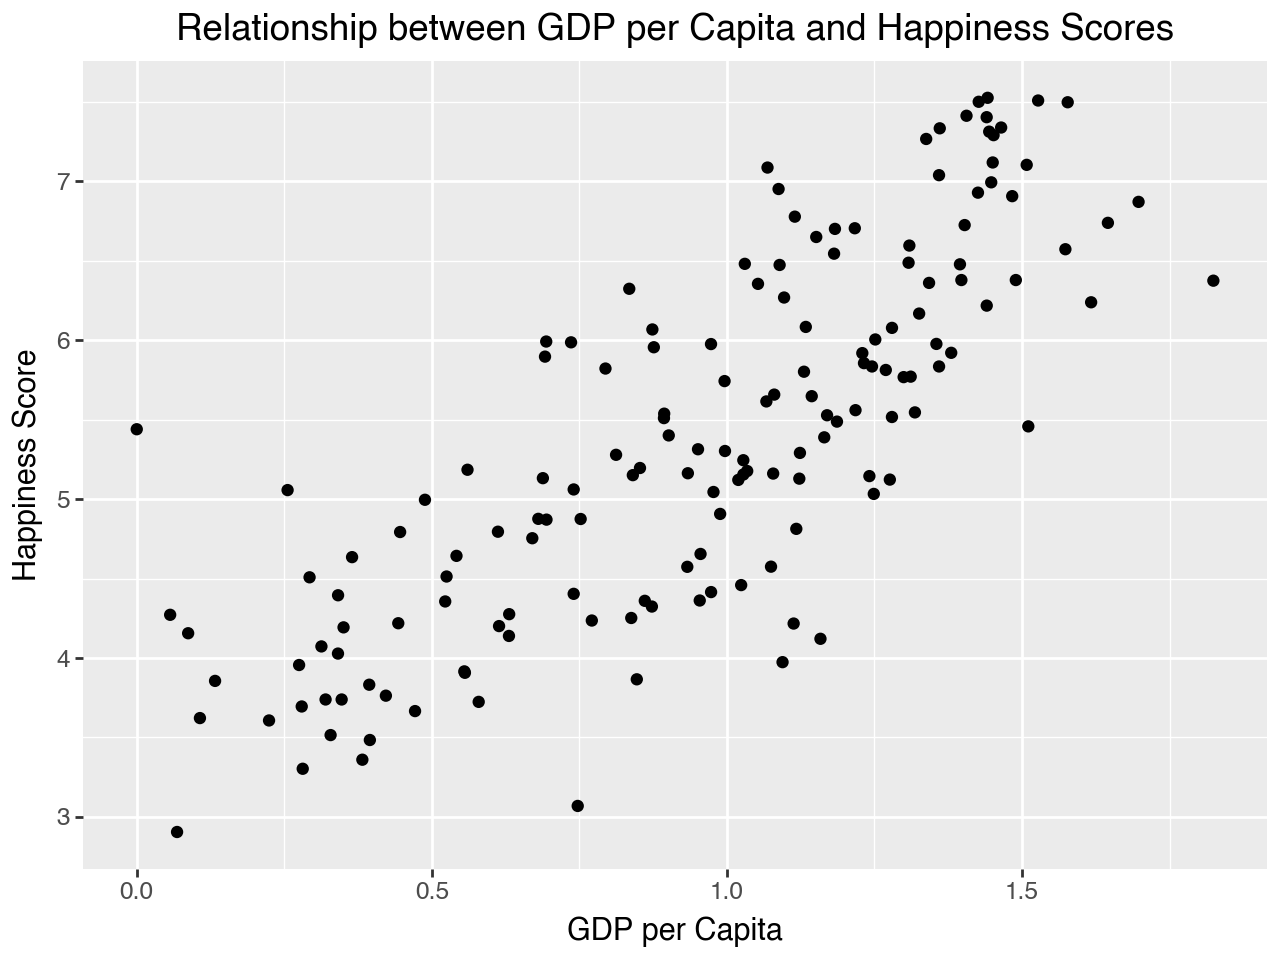

In [11]:
from plotnine import ggplot, aes, geom_point, labs, theme

(ggplot(happiness_report, aes(x='Economy (GDP per Capita)', y='Happiness Score')) +
 geom_point() +
 labs(title='Relationship between GDP per Capita and Happiness Scores', x='GDP per Capita', y='Happiness Score')
)


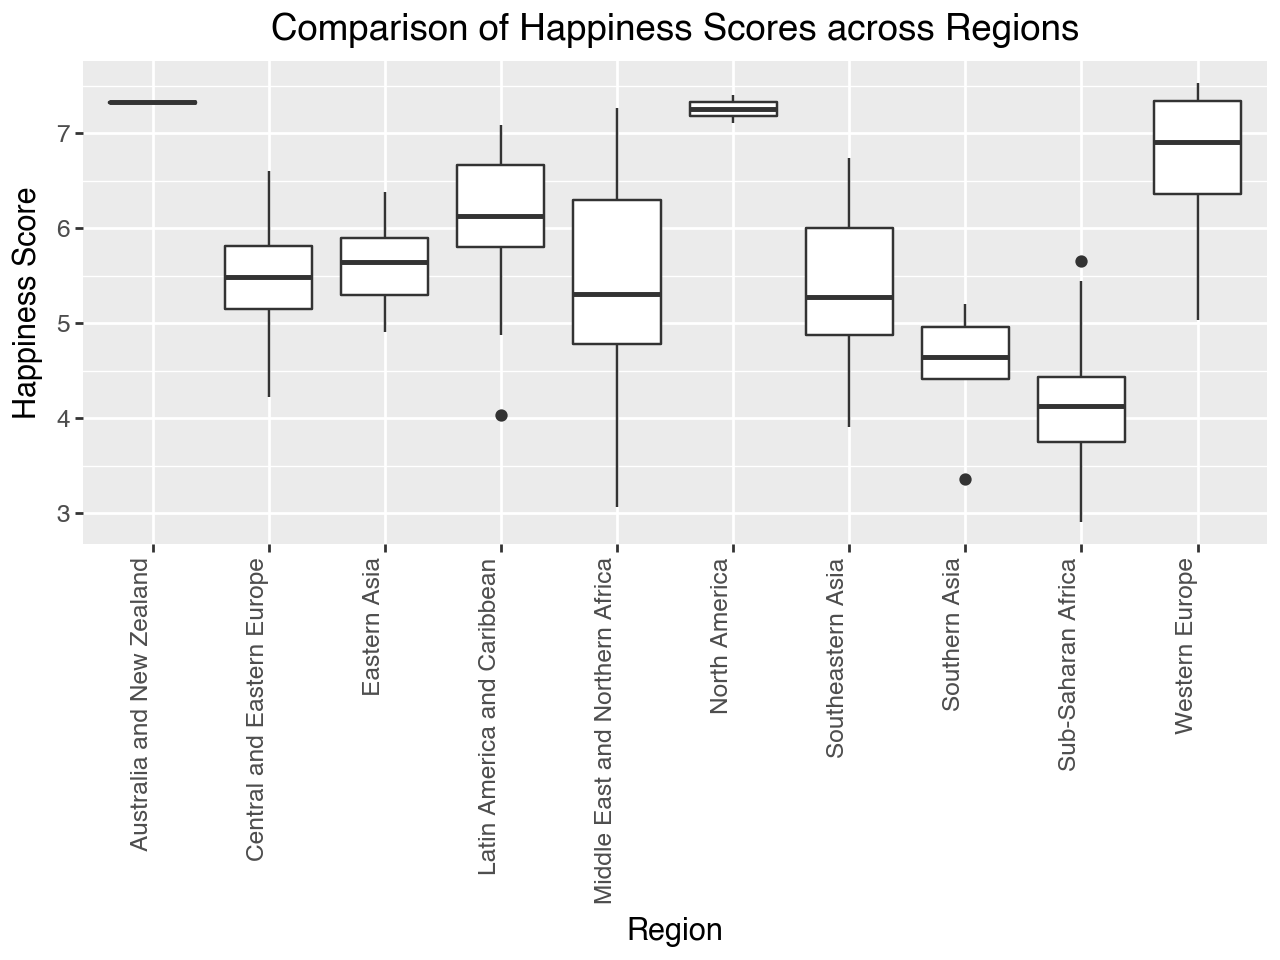

In [12]:
from plotnine import ggplot, aes, geom_boxplot, labs, theme
import plotnine as p9

(ggplot(happiness_report, aes(x='Region', y='Happiness Score')) +
 geom_boxplot() +
 labs(title='Comparison of Happiness Scores across Regions', x='Region', y='Happiness Score') +
 theme(axis_text_x=p9.element_text(rotation=90, hjust=1))
)


In [28]:
correlation_matrix = happiness_report.drop(columns=['Country', 'Region']).corr()
correlation_matrix

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.995743,-0.994928,-0.995525,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness Score,-0.995743,1.000000,0.999485,0.999474,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Lower Confidence Interval,-0.994928,0.999485,1.000000,0.997919,0.790673,0.741523,0.769177,0.566857,0.404840,0.158025,0.538793
Upper Confidence Interval,-0.995525,0.999474,0.997919,1.000000,0.789140,0.736184,0.760752,0.566203,0.398775,0.155495,0.548164
Economy (GDP per Capita),-0.793577,0.790322,0.790673,0.789140,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,-0.733276,0.739252,0.741523,0.736184,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),-0.767991,0.765384,0.769177,0.760752,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,-0.557169,0.566827,0.566857,0.566203,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),-0.387102,0.402032,0.404840,0.398775,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.145369,0.156848,0.158025,0.155495,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001


In [29]:
correlation_matrix = correlation_matrix.reset_index().melt(id_vars='index').rename(columns={'index': 'Feature 1', 'variable': 'Feature 2', 'value': 'Correlation Coefficient'})
correlation_matrix['Correlation Coefficient'] = correlation_matrix['Correlation Coefficient'].round(2)
correlation_matrix

,Feature 1,Feature 2,Correlation Coefficient
0,Happiness Rank,Happiness Rank,1.00
1,Happiness Score,Happiness Rank,-1.00
2,Lower Confidence Interval,Happiness Rank,-0.99
3,Upper Confidence Interval,Happiness Rank,-1.00
4,Economy (GDP per Capita),Happiness Rank,-0.79
...,...,...,...
116,Health (Life Expectancy),Dystopia Residual,0.10
117,Freedom,Dystopia Residual,0.09
118,Trust (Government Corruption),Dystopia Residual,-0.00
119,Generosity,Dystopia Residual,-0.13


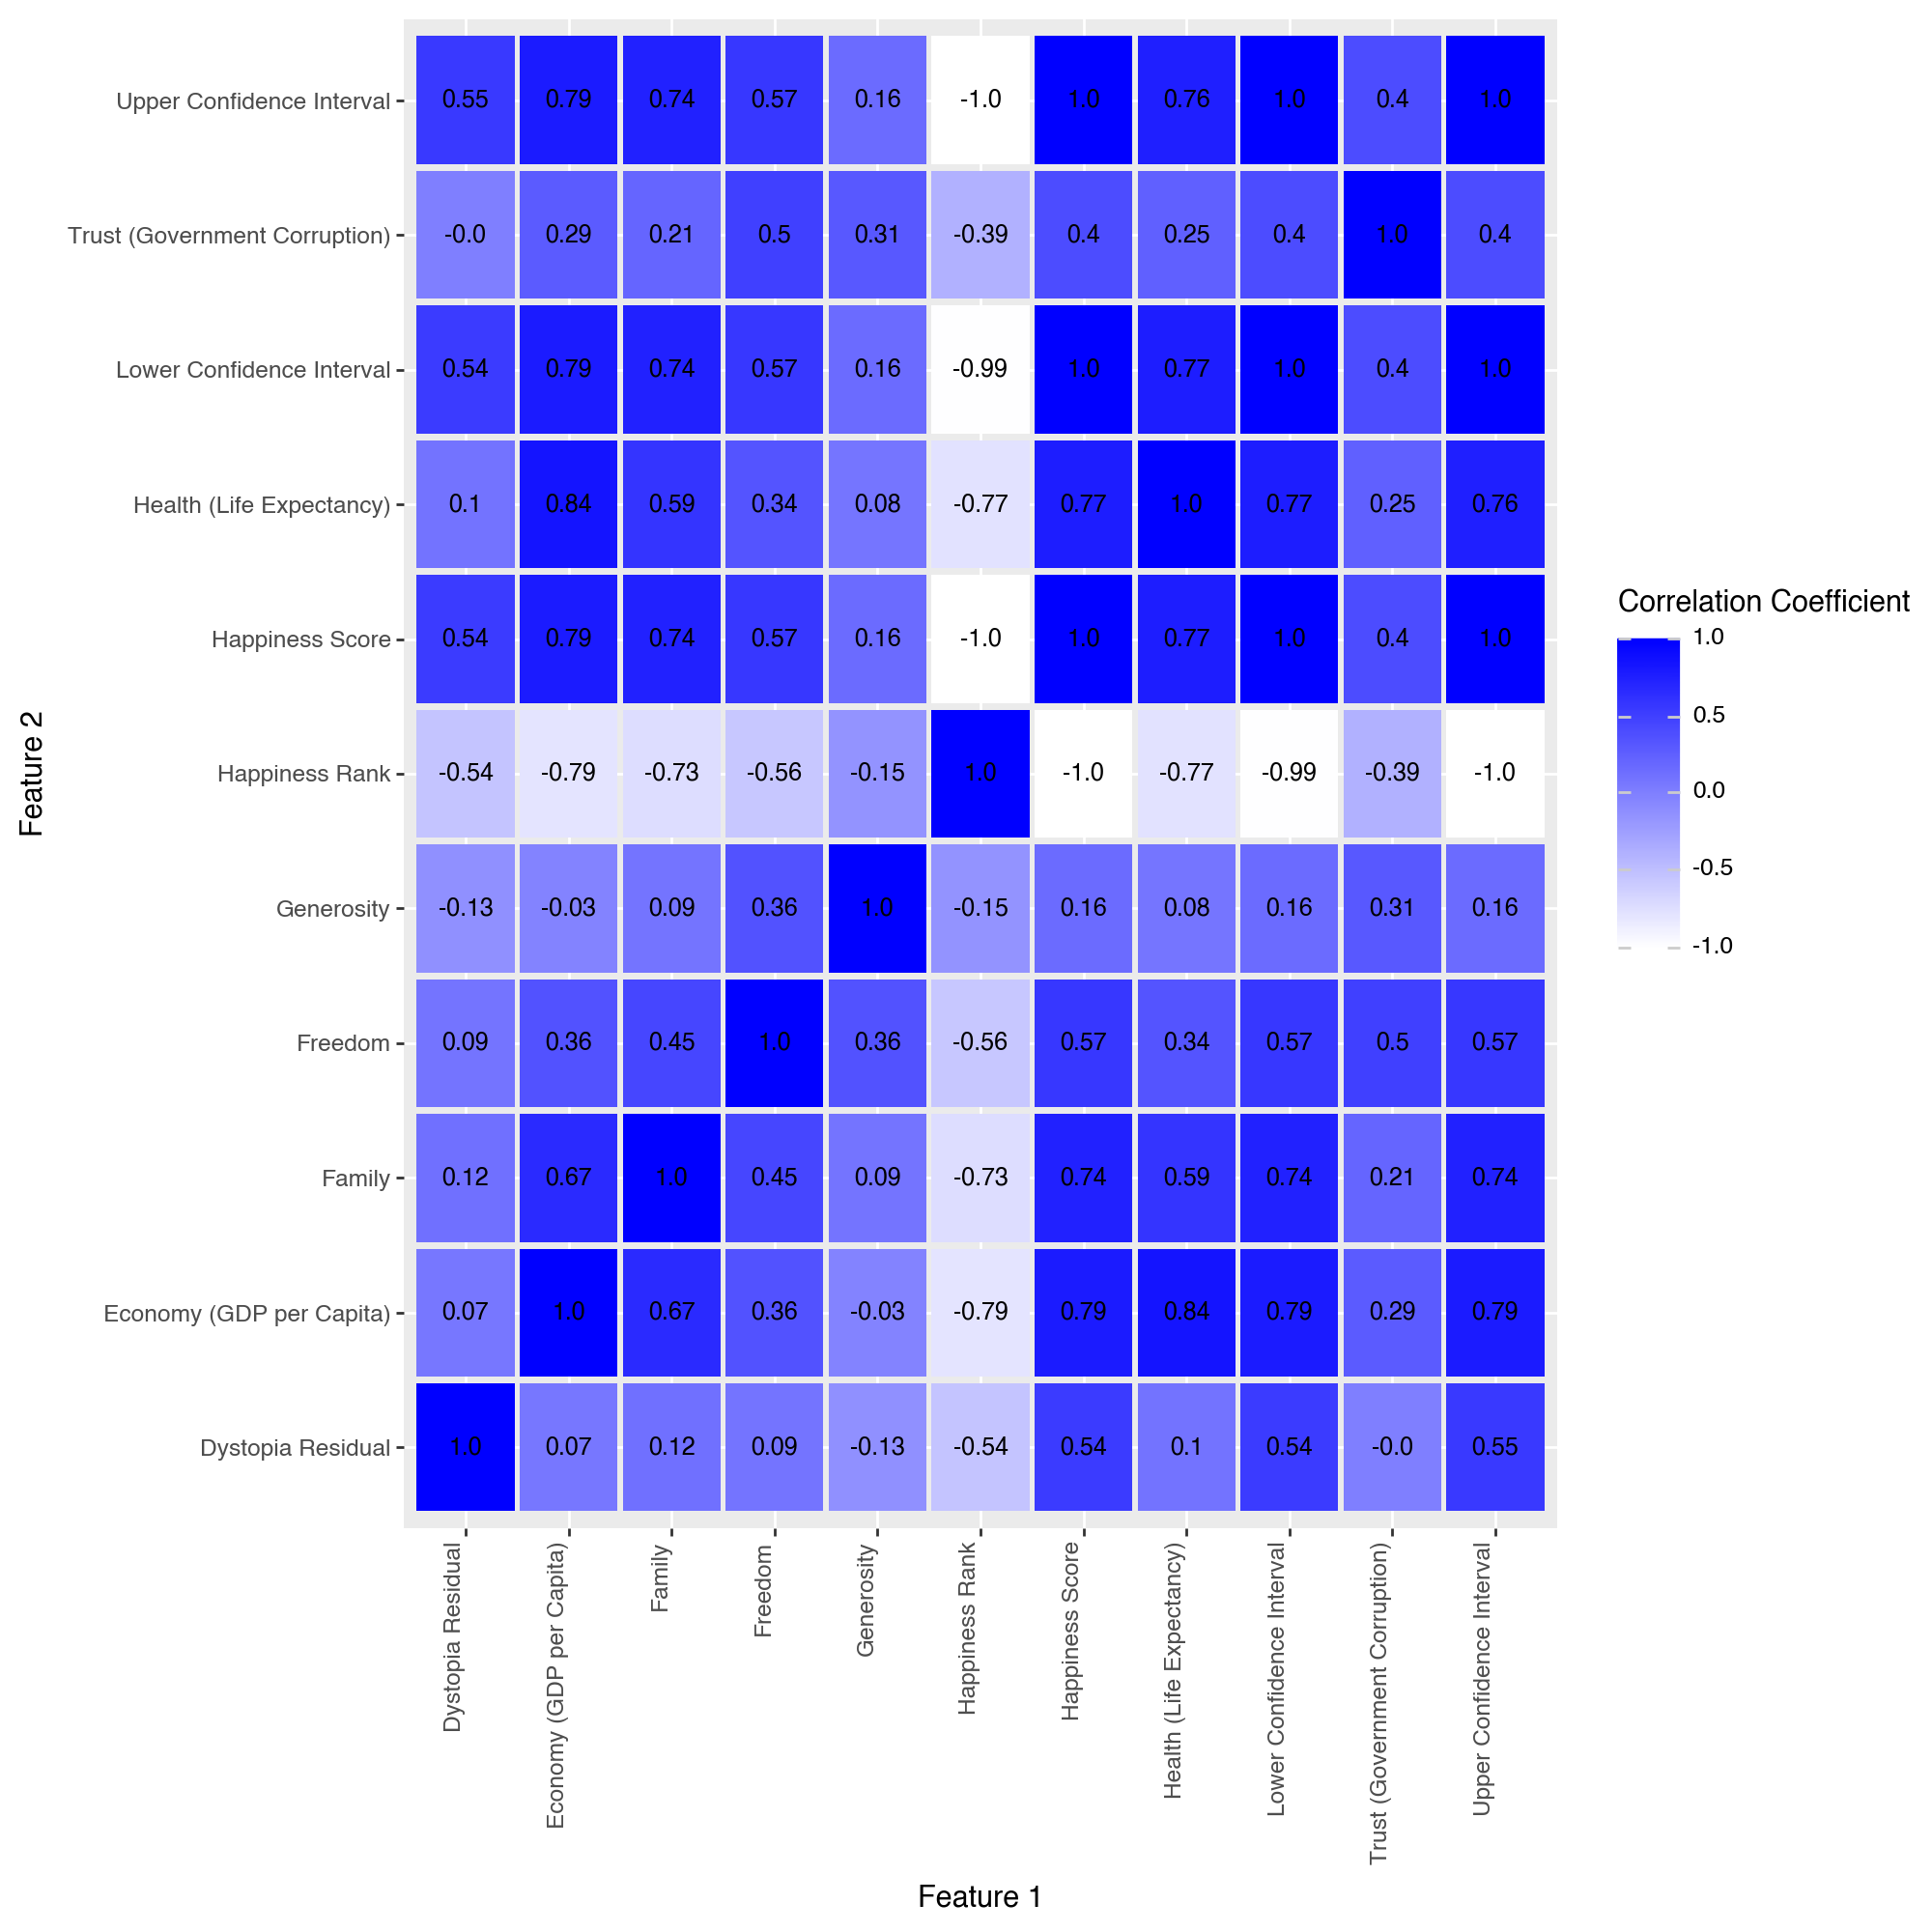

In [30]:
from plotnine import ggplot, aes, geom_tile, scale_fill_gradient, theme, geom_text
import plotnine as p9

# Create the heatmap
heatmap = (ggplot(correlation_matrix, aes(x='Feature 1', y='Feature 2', fill='Correlation Coefficient')) +
         geom_tile(aes(width=0.95, height=0.95)) +
         geom_text(aes(label="Correlation Coefficient"), size=9) +
         scale_fill_gradient(low='white', high='blue') +
         theme(axis_text_x=p9.element_text(rotation=90, hjust=1),
             axis_text_y=p9.element_text(rotation=0, hjust=1),
             figure_size=(10, 10))
        )

# Display the heatmap
heatmap


In [10]:
# Interactive World Map using Plotly
px.choropleth(happiness_report, locations="Country", locationmode="country names",
              color="Happiness Score", title="Global Happiness Scores").show()

In [33]:
happiness_report

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [6]:
px.scatter(
    happiness_report,
    x='Health (Life Expectancy)',
    y='Freedom',
    color='Happiness Score',
    size='Happiness Score',
    hover_name='Country',
    color_continuous_scale='Viridis',
    title='Relationships between health, freedom, and happiness'
)


In [65]:
import numpy as np

data = pd.read_csv('data/pop-2016.csv', usecols=['Country Name', '2016 [YR2016]'])
data.rename(columns={'Country Name': 'Country', '2016 [YR2016]': 'Population'}, inplace=True)
data.dropna(inplace=True)
data.drop(data[data['Population'] == '..'].index, inplace=True)
data['Population'] = data['Population'].astype(int)
# data['log_pop'] = data['Population'].apply(lambda x: np.log(x))
data

,Country,Population,log_pop
0,Afghanistan,34636207,17.360410
1,Albania,2876101,14.871946
2,Algeria,40339329,17.512837
3,American Samoa,50448,10.828698
4,Andorra,72540,11.191893
...,...,...,...
261,Sub-Saharan Africa,1036155989,20.758784
262,Sub-Saharan Africa (excluding high income),1036061312,20.758692
263,Sub-Saharan Africa (IDA & IBRD countries),1036155989,20.758784
264,Upper middle income,2711688425,21.720837


In [66]:
happiness_report_df = happiness_report.merge(data, on='Country')
happiness_report_df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Population,log_pop
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,5728010,15.560879
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,8373338,15.940563
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,335439,12.723195
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,5234519,15.470786
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,5495303,15.519404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819,11930899,16.294642
131,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,11260085,16.236775
132,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,34636207,17.360410
133,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,7661354,15.851699


In [70]:
import plotly.express as px

fig = px.scatter(happiness_report_df, x='Trust (Government Corruption)', y='Generosity', size='Population',
                 color='Happiness Score', hover_name='Country',
                 title='Impact of Trust (Government Corruption) and Generosity on Happiness Scores',
                 labels={'Trust (Government Corruption)': 'Trust (Government Corruption)', 'Generosity': 'Generosity', 'Population': 'Population'})

fig.update_layout(xaxis=dict(title='Social Support'), yaxis=dict(title='Generosity'))

fig.show()
